In [0]:
import tensorflow as tf
from google.colab import drive

In [0]:
import os
import cv2
import numpy as np
import re

In [0]:
drive.mount('/content/gdrive')
model_path = '/content/gdrive/My Drive/imagenet'
graph_path = os.path.join(model_path, 'classify_image_graph_def.pb')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Copied from tf/models
class NodeLookup(object):
  """Converts integer node ID's to human readable labels."""

  def __init__(self,
               label_lookup_path=None,
               uid_lookup_path=None):
    if not label_lookup_path:
      label_lookup_path = os.path.join(
          FLAGS.model_dir, 'imagenet_2012_challenge_label_map_proto.pbtxt')
    if not uid_lookup_path:
      uid_lookup_path = os.path.join(
          FLAGS.model_dir, 'imagenet_synset_to_human_label_map.txt')
    self.node_lookup = self.load(label_lookup_path, uid_lookup_path)

  def load(self, label_lookup_path, uid_lookup_path):
    """Loads a human readable English name for each softmax node.
    Args:
      label_lookup_path: string UID to integer node ID.
      uid_lookup_path: string UID to human-readable string.
    Returns:
      dict from integer node ID to human-readable string.
    """
    if not tf.gfile.Exists(uid_lookup_path):
      tf.logging.fatal('File does not exist %s', uid_lookup_path)
    if not tf.gfile.Exists(label_lookup_path):
      tf.logging.fatal('File does not exist %s', label_lookup_path)

    # Loads mapping from string UID to human-readable string
    proto_as_ascii_lines = tf.gfile.GFile(uid_lookup_path).readlines()
    uid_to_human = {}
    p = re.compile(r'[n\d]*[ \S,]*')
    for line in proto_as_ascii_lines:
      parsed_items = p.findall(line)
      uid = parsed_items[0]
      human_string = parsed_items[2]
      uid_to_human[uid] = human_string

    # Loads mapping from string UID to integer node ID.
    node_id_to_uid = {}
    proto_as_ascii = tf.gfile.GFile(label_lookup_path).readlines()
    for line in proto_as_ascii:
      if line.startswith('  target_class:'):
        target_class = int(line.split(': ')[1])
      if line.startswith('  target_class_string:'):
        target_class_string = line.split(': ')[1]
        node_id_to_uid[target_class] = target_class_string[1:-2]

    # Loads the final mapping of integer node ID to human-readable string
    node_id_to_name = {}
    for key, val in node_id_to_uid.items():
      if val not in uid_to_human:
        tf.logging.fatal('Failed to locate: %s', val)
      name = uid_to_human[val]
      node_id_to_name[key] = name

    return node_id_to_name

  def id_to_string(self, node_id):
    if node_id not in self.node_lookup:
      return ''
    return self.node_lookup[node_id]


In [0]:
from matplotlib import pyplot as plt
from matplotlib import image as img

def load_images(dir):
  images = np.empty(shape=(1, 1080, 1080, 3), dtype='int64')
  img_path = '/content/gdrive/My Drive/'
  full_path = os.path.join(img_path, dir)
  for filename in os.listdir(full_path):
    img_file = img.imread(os.path.join(full_path, filename), )
    img_file = cv2.resize(img_file, dsize=(1080, 1080), interpolation=cv2.INTER_CUBIC)
    img_file = np.array(img_file, dtype='int64')

    if img_file is not None:
      images = np.insert(images, 0, values=img_file, axis=0)

  return images

images = load_images('Michele Boyd')

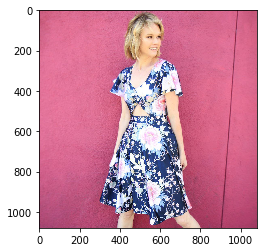

In [0]:
images[0].shape
plt.imshow(images[6])

In [0]:
with tf.gfile.FastGFile(graph_path, 'rb') as graphFile:
  graph_def = tf.GraphDef()
  graph_def.ParseFromString(graphFile.read())

  # Import  the graph definition into the current tf session
  _ = tf.import_graph_def(graph_def, name='Imagenet')

In [0]:
label_path = os.path.join(model_path, 'imagenet_2012_challenge_label_map_proto.pbtxt')
human_label_path = os.path.join(model_path, 'imagenet_synset_to_human_label_map.txt')
node_lookup = NodeLookup(label_lookup_path=label_path, uid_lookup_path=human_label_path)

In [0]:
michele_file = input()

/content/gdrive/My Drive/Michele Boyd/micheleboyd_54511448_2563404330396387_2904555047480603810_n.jpg


In [0]:
with tf.Session() as sess:
  # file_writer = tf.summary.FileWriter(logdir='logs', graph=sess.graph)
  # tensorboard --logdir logs
  output_tensor = sess.graph.get_tensor_by_name('Imagenet/softmax:0')

  image_data = tf.gfile.GFile(michele_file, 'rb').read()
  input_tensor_name_data = {'Imagenet/DecodeJpeg/contents:0': image_data}
  predictions = sess.run(output_tensor, feed_dict=input_tensor_name_data)
  predictions = np.squeeze(predictions)
  top_predictions = predictions.argsort()[-5:][::-1]

  for prediction in top_predictions:
    percentage = predictions[prediction]
    human_string = node_lookup.id_to_string(prediction)
    print(human_string)
  print(top_predictions)

sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita
cowboy hat, ten-gallon hat
albatross, mollymawk
paintbrush
bonnet, poke bonnet
[410 881 441 504 805]


In [0]:
arr1 = np.empty(shape=(1, 3, 3, 3))
arr2 = np.zeros(shape=(3, 3, 3))

In [0]:
np.insert(arr1, 0, values=arr2, axis=0)

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]])

In [0]:
arr3 = np.array(arr1, dtype='int64')

In [0]:
arr3

array([[[[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]]]])

In [0]:
a = input()

a
